# Polynomial Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('stock_dataset.csv')
df= dataset[(dataset != 0).all(1)]
X = df.iloc[:, 2:-1].values #python range : includes lower bound and excludes upper bound
y = df.iloc[:, -1].values

In [ ]:
print(X)

[[ 340.    320.    339.3  ...    5.05   85.72  142.52]
 [ 369.7   330.    330.   ...    5.05   85.72  142.52]
 [ 377.9   345.    377.9  ...    5.05   85.72  142.52]
 ...
 [2075.   2050.   2059.8  ...    5.2   245.62  351.73]
 [2060.1  2052.   2052.   ...    5.2   245.62  351.73]
 [2052.1  2046.3  2052.1  ...    5.2   245.62  351.73]]


In [ ]:
print(y)

[ 332.   356.   345.  ... 2060.  2052.2 2046.4]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(y_test)

[ 508.  1014.   523.  1650.   921.  1801.  1002.5 2150.   343.  1590.
  488.  2222.  1584.9 1565.2  323.9 1822.  1469.  2111.1  967.9 1403.
 1287.  1380.   942.  1573.3 2220.   560.   684.  1160.2  808.   720.
 1532.  1579.8 1468.   605.   330.1 1450.  1200.   952.  1800.   515.
 1530.6 1677.  1190.  1570.3 1971.2 1499.  1468.   642.   509.3 1224.7
 1576.  2134.   550.  1565.   922.   512.  1107.  1334.1 1052.  1056.9
 1800.  1063.8  315.  1974.   644.   882.  2175.  1939.   630.1  899.9
 1503.   840.  1570.  1500.   528.  1800.  1581.  1460.1 1115.  1715.
  560.  1436.   790.   775.   521.4 1442.8  856.  1725.2 1565.1 1588.
 1459.1  714.  1529.  1100.   644.  1611.2 1491.   326.   530.  2160.
  525.  1591.   824.  2180.  1350.   634.   553.5 1479.  1151.7 1025.
 2360.  1142.  1382.3  999.  1453.5  348.9 2110.   551.  1593.4 1868.1
 1384.  1584.   540.  1698.1  996.  1645.7 1560.   570.   539.5  502.
 1190.  1151.  1306.   358.5  337.   599.9 1430.   875.  1810.5 1412.2
 1485.   736.3 

## Training the Polynomial Regression model on the Training set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 515.76  508.  ]
 [ 988.95 1014.  ]
 [ 521.64  523.  ]
 ...
 [2193.09 2164.9 ]
 [1481.77 1481.6 ]
 [ 953.05  955.  ]]


## Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3445515.10106204

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print (rms)

957268.2420376672


Text(0.5, 1.0, 'Actual vs predicted')

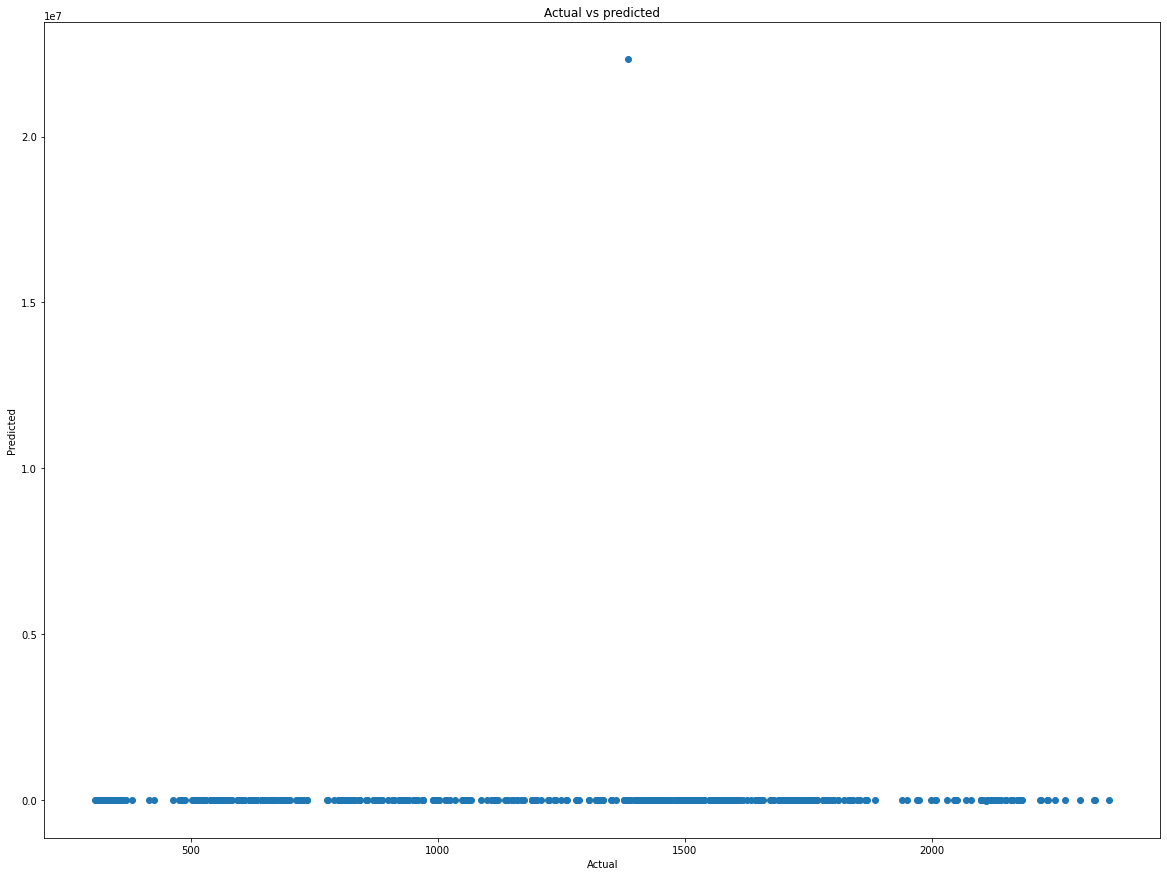

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs predicted')
